# E-commerce Product Analytics: Customer & Sales Insights

#### Objective:
The goal of this project is to analyze customer behavior, product performance, and sales trends from an e-commerce dataset to derive insights that can improve business strategy.

#### Key Questions:
1. Which products generate the most revenue?
2. Who are the top customers by purchase frequency and spending?
3. What are the monthly and seasonal sales trends?
4. How do different product categories perform?
5. What recommendations can improve customer retention and sales?


In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Data handling
from datetime import datetime

pd.set_option('display.max_columns', None)

In [2]:
#Loading the dataset

df = pd.read_excel(r"C:\Users\ikeol\OneDrive\Desktop\Product Analytics (Projects)\Online Retail.xlsx")


In [3]:
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


(541909, 8)

In [4]:
#plot style

print(plt.style.available)
plt.style.use('seaborn-v0_8-dark')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Cleaning for Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
has_duplicates = df.duplicated().any()

num_duplicates = df.duplicated().sum()

print(has_duplicates)
print('The number of duplicate row is ' + str(num_duplicates))

True
The number of duplicate row is 5268


In [8]:
# Removing Duplicates from the dataframe

df.drop_duplicates(inplace = True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [10]:
unique_desc = df['Description'].unique()

print("First 10 unique descriptions:")
print(unique_desc[:10])  # First 10

print("\nLast 10 unique descriptions:")
print(unique_desc[-10:])  # Last 10


First 10 unique descriptions:
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']

Last 10 unique descriptions:
['lost??' '???' 'LETTER "U" BLING KEY RING' 'wet' 'wet boxes'
 '????damages????' 'mixed up' 'lost' 'CREAM HANGING HEART T-LIGHT HOLDER'
 'PAPER CRAFT , LITTLE BIRDIE']


In [11]:
# Delete rows where Description contains '?'
df = df[~df['Description'].str.contains(r'\?', na=False)]

print("Remaining '?' rows:", df['Description'].str.contains(r'\?', na=False).sum())

Remaining '?' rows: 0


In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
# Handling missing values

df = df.copy()

df['Description'] = df['Description'].replace('',pd.NA)

# Create a dictionary mapping StockCode to the first non-missing Description
stock_desc_map = df.dropna(subset=['Description']).drop_duplicates('StockCode').set_index('StockCode')['Description'].to_dict()

# Update the 'Description' column using the dictionary, keeping original Description if StockCode not in map
df['Description'] = df.apply(
    lambda row: stock_desc_map.get(row['StockCode'], row['Description']),
    axis=1
)

In [14]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134955
Country             0
dtype: int64

In [15]:
df['Description'].fillna('No Description', inplace=True)

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134955
Country             0
dtype: int64

In [16]:
#Creating a new column "Customer Staus" to be able to differentiate new customers from returning ones 

df['Customer_Status'] = df['CustomerID'].apply(lambda x: 'Guest' if pd.isna(x) else 'Registered')

#Replacing missing CustomerIDs with 0 for uniformity
df['CustomerID'].fillna(0, inplace=True)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Customer_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Registered
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Registered
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Registered
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Registered
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Registered


In [17]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
Customer_Status    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536559 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        536559 non-null  object        
 1   StockCode        536559 non-null  object        
 2   Description      536559 non-null  object        
 3   Quantity         536559 non-null  int64         
 4   InvoiceDate      536559 non-null  datetime64[ns]
 5   UnitPrice        536559 non-null  float64       
 6   CustomerID       536559 non-null  float64       
 7   Country          536559 non-null  object        
 8   Customer_Status  536559 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.9+ MB


### Exploratory Data analysis

#### Top selling Products

In [19]:
#Creating a column of calculated revenue to be able to rank products based on the revenue

df['Revenue'] = df['UnitPrice'] * df['Quantity']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536559 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        536559 non-null  object        
 1   StockCode        536559 non-null  object        
 2   Description      536559 non-null  object        
 3   Quantity         536559 non-null  int64         
 4   InvoiceDate      536559 non-null  datetime64[ns]
 5   UnitPrice        536559 non-null  float64       
 6   CustomerID       536559 non-null  float64       
 7   Country          536559 non-null  object        
 8   Customer_Status  536559 non-null  object        
 9   Revenue          536559 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 45.0+ MB


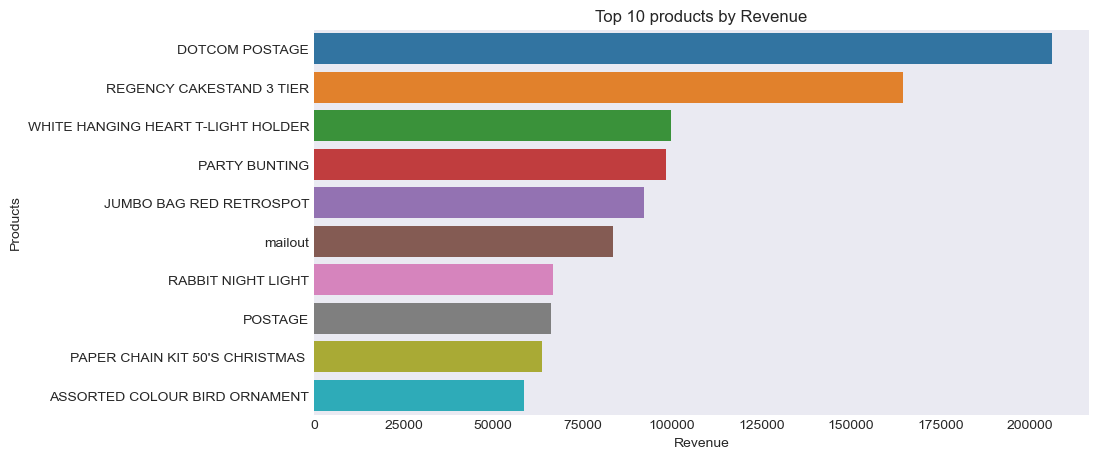

In [20]:
# Grouping the products based on their names and calculated revenue in a descending order showint the top 10 products

Top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending = False).head(10)

# plotting a graph, name the graph and the axiz 
plt.figure(figsize=(10,5))
sns.barplot(x=Top_products.values, y=Top_products.index)
plt.title("Top 10 products by Revenue")
plt.xlabel('Revenue')
plt.ylabel('Products')
plt.show()

#### Monthly Sales Trend

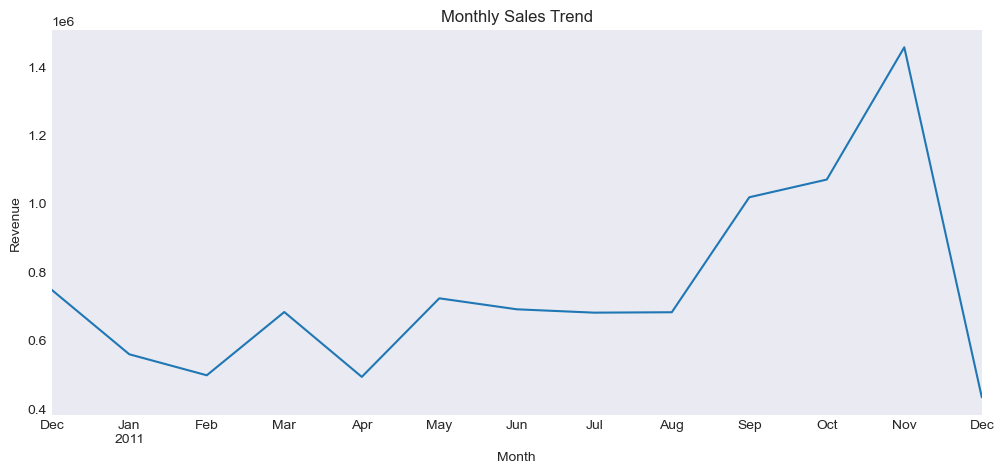

In [21]:
# Grouping revenues by months

df['month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('month')['Revenue'].sum()

# Creating a line plot to show monthly sales trend
monthly_sales.plot(figsize = (12,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel('Revenue')
    
plt.show()

#### Top Customers

In [22]:
Top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending = False).head(10)
Top_customers

CustomerID
0.0        1447487.53
14646.0     279489.02
18102.0     256438.49
17450.0     187322.17
14911.0     132458.73
12415.0     123725.45
14156.0     113214.59
17511.0      88125.38
16684.0      65892.08
13694.0      62690.54
Name: Revenue, dtype: float64

#### Customer Segmentation by spending

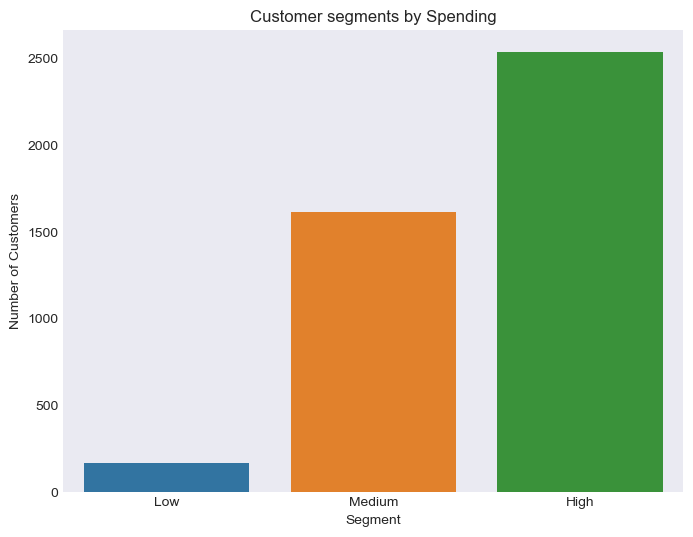

In [23]:
#Total spending per customer
df['Total Price'] = df['Quantity'] * df['UnitPrice']
customer_spend = df.groupby('CustomerID')['Total Price'].sum().reset_index()
customer_spend.sort_values(by = 'Total Price', ascending = False).head(10)

#Segmenting customer spend by percentile
customer_spend['segment'] = pd.cut(customer_spend['Total Price'],
    bins=[0, 100, 500, customer_spend['Total Price'].max()],
    labels=['Low', 'Medium', 'High']
)

segment_summary = customer_spend['segment'].value_counts().sort_index()

#Plotting Customer Segments by Spending
plt.figure(figsize = (8,6))
sns.barplot(x = segment_summary.index, y = segment_summary.values)
plt.title('Customer segments by Spending')
plt.xlabel('Segment')
plt.ylabel("Number of Customers")
plt.show()

#### Repeat Purchase Analysis

  Customer Type  Total Orders  Percentage
0         Guest          3628   14.052212
1    Registered         22190   85.947788


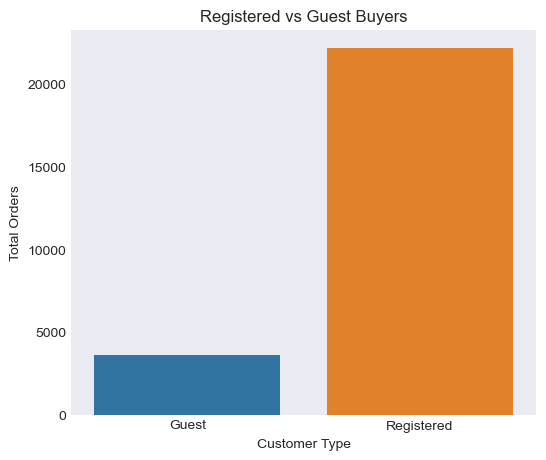

In [24]:
df['Customer_Status'].value_counts()

# Count orders by customer type
repeat_purchase_summary = df.groupby('Customer_Status')['InvoiceNo'].nunique().reset_index()

repeat_purchase_summary.columns = ['Customer Type', 'Total Orders']

# Calculate percentage share
repeat_purchase_summary['Percentage'] = (
    repeat_purchase_summary['Total Orders'] / repeat_purchase_summary['Total Orders'].sum()) * 100

print(repeat_purchase_summary)

#Plot graph for visualization
plt.figure(figsize=(6,5))
sns.barplot(data=repeat_purchase_summary,x='Customer Type',y='Total Orders')
plt.title("Registered vs Guest Buyers")
plt.xlabel("Customer Type")
plt.ylabel("Total Orders")
plt.show()


#### Revenue Contribution by region

           Country      Revenue  Contribution (%)
36  United Kingdom  8167128.184         83.972058
24     Netherlands   284661.540          2.926808
10            EIRE   262993.380          2.704022
14         Germany   221509.470          2.277497
13          France   197317.110          2.028758
0        Australia   137009.770          1.408695
33     Switzerland    56363.050          0.579509
31           Spain    54756.030          0.562986
3          Belgium    40910.960          0.420635
32          Sweden    36585.410          0.376161


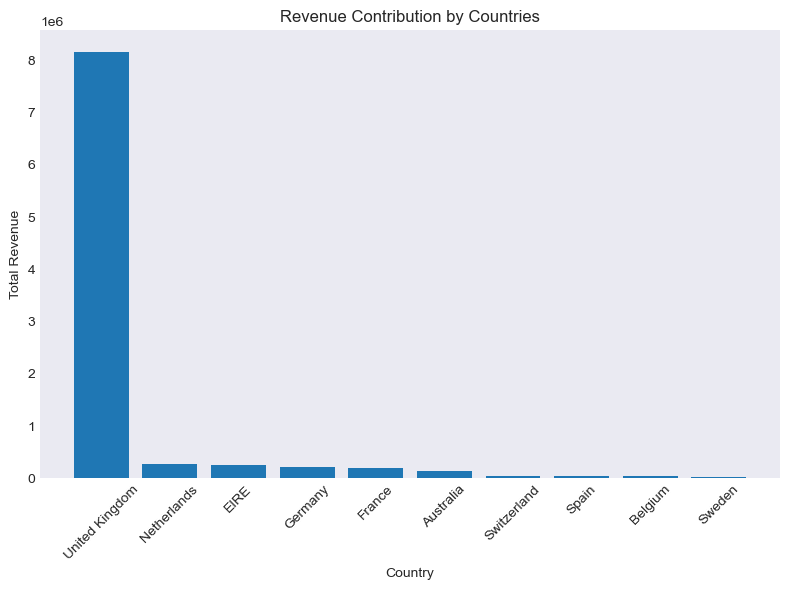

In [25]:
#Group by region and sum the revenue
region_revenue = df.groupby('Country', as_index = False)['Revenue'].sum()

#Calculating Contrbution percentage
region_revenue['Contribution (%)'] = (region_revenue['Revenue'] / region_revenue['Revenue'].sum()) * 100

#Sorting by highest revenue
region_revenue = region_revenue.sort_values(by = 'Revenue', ascending = False).head(10)

print(region_revenue)

plt.figure(figsize=(8,6))
plt.bar(region_revenue['Country'], region_revenue['Revenue'])
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Revenue Contribution by Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()